# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
pwd

'C:\\Users\\Armstrongs\\Desktop\\SpringboardProjects\\Frequentist Case Study'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<function matplotlib.pyplot.show(close=None, block=None)>

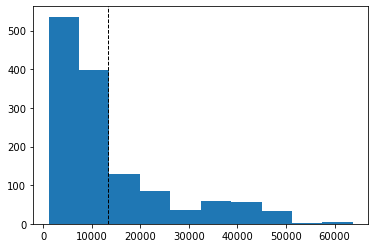

In [5]:
plt.hist(medical['charges'])
plt.axvline(medical['charges'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show

In [6]:
chargemean = np.mean(medical['charges'])
chargestd = np.std(medical['charges'])
print(chargemean)
print(chargestd)
#Comment on the appropriateness of these statistics for the data
#I'm not entirely sure how to interpret this line. When would a statistic be inappropriate for the data? Is it asking if the 
#Numbers here make sense? The STD seems unusually high, but I'd be willing to guess that has to do with the huge range of 
#charges. 

13270.422265141257
12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: I would create a sampling distribution by pulling a large random sample from this set several times to create a margin
of error. If the mean of the sampling distribution - the margin of error is <= 12,000 then there would be a problem. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [7]:
#Hypothesis: The average charge is < 12000 in the hospital
#Null Hypothesis: The average charge is > 12000
#Given that the null hypothesis specifies that the hospital charge is negative I believe that a one-sided interval is
#appropriate

__A:__

In [8]:
seed(21)
def hospital_sampler(n):
    return np.random.choice(medical['charges'], n)

In [9]:
dist = pd.DataFrame(np.mean(hospital_sampler(100)) for i in range(10000))

In [10]:
dist_mean = float(np.mean(dist))
dist_std = float(np.std(dist))
moe = 1.96*(dist_std/np.sqrt(len(dist)))
print("The mean confidence interval is between " + str(dist_mean - moe) + " and " + str(dist_mean + moe))

The mean confidence interval is between 13240.717693348868 and 13288.326295639343


In [11]:
moe

23.804301145237233

In [12]:
#realized here that I didn't use the T-value as I should have done. Leaving it up to remind myself later but fixing below

In [13]:
#step 1
degofree = len(dist) - 1
step2 = (1 - .95)/2
#Step 3 t value = 1.645006
#step 4
step4 = dist_std / np.sqrt(10000)
step5 = 1.645006 * step4 #This is the MOE



In [14]:
print("The mean confidence interval is between " + str(dist_mean - step5) + " and " + str(dist_mean + step5))
moe2 = step5
print(moe2)

The mean confidence interval is between 13244.543311734044 and 13284.500677254167
19.978682760062306


In [15]:
#Note: I feel like I must have made a mistake here because my T value generated margin of error should be wider than my 
# Z generated moe

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:Null hypothesis: There is no variance between charges to the insured compared to the uninsured that cannot be explained by random chance within the confidence interval of 95%.
Alternative hypothesis: There is a statistically significant difference between charges made to those with and without insurance.
Here we are assuming that the variances of the two groups are both normally distributed

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
insured = medical[medical['insuranceclaim'] == 1]
uninsured = medical[medical['insuranceclaim'] == 0]

In [17]:

def hospital_sampleri(n):
    return np.random.choice(insured['charges'], n)
def hospital_sampleru(n):
    return np.random.choice(uninsured['charges'], n)

In [18]:
distinsured = pd.DataFrame(np.mean(hospital_sampleri(100)) for i in range(10000))

distuninsured = pd.DataFrame(np.mean(hospital_sampleru(100)) for i in range(10000))

In [19]:
distinsured.rename(columns = {0:'insured'}, inplace = True)
distuninsured.rename(columns = {0:'uninsured'}, inplace = True)
combined = pd.DataFrame()
combined['insured'] = distinsured['insured']
combined['uninsured'] = distuninsured['uninsured']
#Step 1 (https://www.statisticshowto.com/probability-and-statistics/t-test/)
combined['diff'] = combined['insured'] - combined['uninsured']
combined.head()

,insured,uninsured,diff
0,14023.692807,8096.829350,5926.863457
1,14541.191088,8378.166488,6163.024600
2,15009.813899,8063.093717,6946.720182
3,16078.176597,9272.025122,6806.151475
4,14511.823322,9698.911125,4812.912197


In [20]:
#step2
step2 = sum(combined['diff'])
step2

76035648.57731912

In [21]:
#step3
combined['squared'] = combined['diff']**2

In [22]:
#step4
step4 = sum(combined['squared'])
step4

602075394916.8912

In [23]:
#t = (step2 / len(combined) / np.sqrt((step4 - (step2**2)/len(combined)/(len(combined)-1)*(len(combined))))
l = len(combined)
ttest1 = (step2/l)/np.sqrt((step4-(step2**2/l))/(l-1)*l)

In [24]:
ttest1

0.04914657455471909

In [39]:
import scipy

In [40]:
scipy.stats.ttest_ind(distinsured, distuninsured)
#YES!!!!
#Although without reimporting scipy I kept getting an error that scipy was not found. 

Ttest_indResult(statistic=array([491.17570776]), pvalue=array([0.]))

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: is it this: "zscore(a[, axis, ddof, nan_policy])"?
This is talking about generating the zscore? 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test